In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
df_full = pandas.read_csv("./data/python_output_may12.csv")
df = df_full.sample(1000)

In [12]:
df['theta'] = np.arctan2(df['collR']-7112, df['collY'])

In [13]:
df.head()

,Unnamed: 0,filenum,name,collimator_set,in-out,top-bot,coll,calo,collR,collY,caloR,caloY,goodtriples,efficiency,drifttime,corner_num,ncaloentries,theta
1168560,1168560,97,simutree_muonsAndPositrons_col8_28,8,NaN,NaN,8,21,7065.996162,-9.625914,7020.457091,23.899969,11829,0.304440,159.914681,28,6,-1.777062
100341,100341,8,simutree_muonsAndPositrons_col8_33,8,NaN,NaN,8,22,7071.296654,-23.500000,7022.081555,-3.914700,11673,0.309612,17.131083,33,6,-2.094393
613936,613936,50,simutree_muonsAndPositrons_col8_75,8,NaN,NaN,8,2,7158.946629,2.236350,6987.259825,-7.740358,11637,0.298507,42.174193,75,8,1.523196
1013291,1013291,84,simutree_muonsAndPositrons_col8_52,8,NaN,NaN,8,0,7119.426117,-46.409626,7022.659836,-34.061607,10223,0.278875,29.588561,52,9,2.982925
1097824,1097824,90,simutree_muonsAndPositrons_col8_13,8,NaN,NaN,8,22,7077.474361,31.889942,7006.574695,33.609074,6838,0.310395,17.116329,13,8,-0.825062


(array([ 84.,  85.,  88.,  87., 143., 136.,  87., 107.,  90.,  93.]),
 array([-3.10986158e+00, -2.48788974e+00, -1.86591790e+00, -1.24394605e+00,
        -6.21974212e-01, -2.36939529e-06,  6.21969473e-01,  1.24394131e+00,
         1.86591316e+00,  2.48788500e+00,  3.10985684e+00]),
 <a list of 10 Patch objects>)

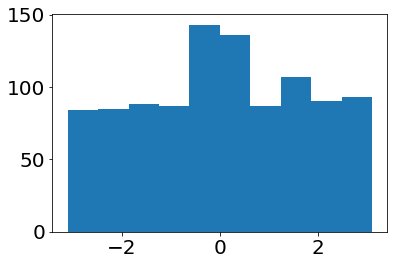

In [14]:
plt.hist(df['theta'])

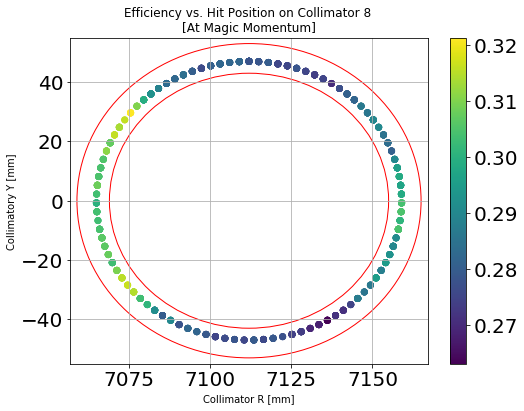

In [33]:
fig,ax = plt.subplots(figsize=(8,6))
plt.title("Efficiency vs. Hit Position on Collimator 8 \n[At Magic Momentum]")
plt.xlabel("Collimator R [mm]")
plt.ylabel("Collimatory Y [mm]")

#circle = plt.Circle((7112, 0), 48, color='xkcd:dark orange', fill=False)
#ax.add_artist(circle)
circle2 = plt.Circle((7112, 0), 43, color='r', fill=False)
ax.add_artist(circle2)
circle3 = plt.Circle((7112, 0), 53, color='r', fill=False)
ax.add_artist(circle3)

plt.scatter(df['collR'], df['collY'], c=df['efficiency'])
plt.colorbar()
plt.grid()

plt.xlim(7112-55, 7112+55)
plt.ylim(-55,55)

plt.show()

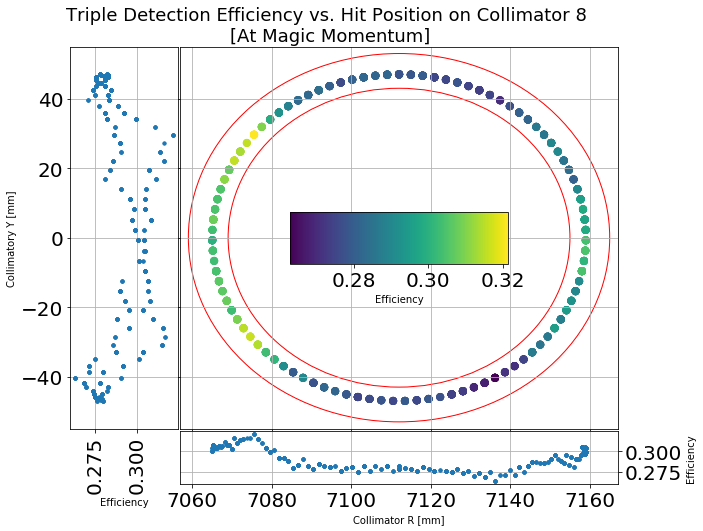

In [127]:
fig = plt.figure(constrained_layout=False, figsize=(8,8))
gs1 = fig.add_gridspec(nrows=10, ncols=10,
                        left=0.05, right=1,
                        bottom=0.05, top=1,
                        wspace=0.05, hspace=0.05 #bottom= 0.05, top=0.06
                      )
ax1 = fig.add_subplot(gs1[:-3, 2:])

plt.suptitle("Triple Detection Efficiency vs. Hit Position on Collimator 8 \n[At Magic Momentum]", y=1.07, fontsize=18)

#circle = plt.Circle((7112, 0), 48, color='xkcd:dark orange', fill=False)
#ax.add_artist(circle)
circle2 = plt.Circle((7112, 0), 43, color='r', fill=False)
ax1.add_artist(circle2)
circle3 = plt.Circle((7112, 0), 53, color='r', fill=False)
ax1.add_artist(circle3)

scatter = ax1.scatter(df['collR'], df['collY'], c=df['efficiency'], s=50)
#plt.colorbar(scatter)
ax1.grid()

ax1.set_xlim(7112-55, 7112+55)
ax1.set_ylim(-55,55)
ax1.set_xticklabels([])
ax1.set_yticklabels([])


ax2 = fig.add_subplot(gs1[-3, 2:])
ax2.plot(df['collR'], df['efficiency'],".")
ax2.set_xlim(7112-55, 7112+55)
ax2.set_ylabel("Efficiency")
ax2.set_xlabel("Collimator R [mm]")
ax2.grid()
ax2.yaxis.set_label_position("right") 
ax2.yaxis.tick_right()


ax3 = fig.add_subplot(gs1[:-3,:2])
ax3.plot(df['efficiency'], df['collY'],".")
ax3.set_ylim(-55,55)
ax3.set_xlabel("Efficiency")
ax3.grid()
ax3.set_ylabel("Collimatory Y [mm]")
plt.sca(ax3)
plt.xticks(rotation=90)
#plt.tight_layout()


ax4 = fig.add_subplot(gs1[3:4,4:8])
cbar = fig.colorbar(scatter, cax=ax4, orientation='horizontal')
cbar.set_label('Efficiency', rotation=0)




plt.show()

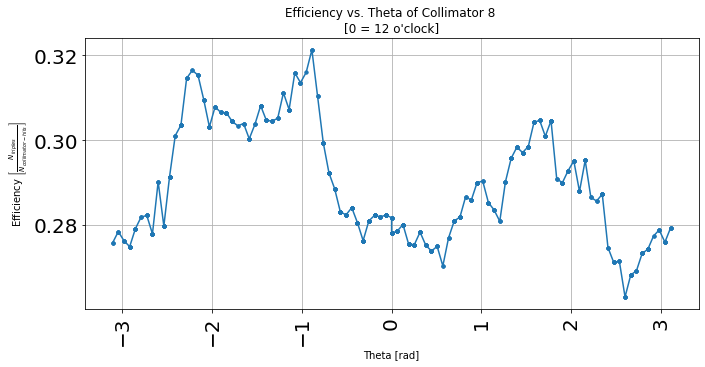

In [70]:
fig,ax = plt.subplots(figsize=(11,5))
df = df.sort_values(by=['theta'])
plt.plot(df['theta'], df['efficiency'],".-")
plt.title("Efficiency vs. Theta of Collimator 8 \n[0 = 12 o'clock]")
plt.xlabel("Theta [rad]")
plt.ylabel(r"Efficiency $\left[ \frac{N_{triples}}{N_{collimator-hits}} \right]$")
plt.xticks(rotation=90)
plt.grid()
plt.show()

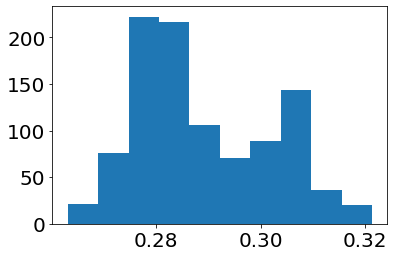

In [132]:
plt.hist(df['efficiency'])
plt.show()

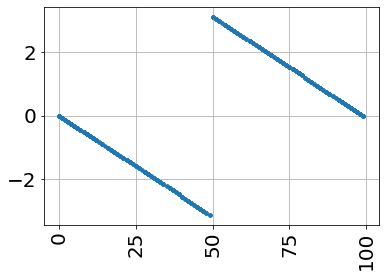

In [19]:
plt.plot(df['corner_num'], df['theta'],".")
plt.xticks(rotation=90)
plt.grid()
plt.show()

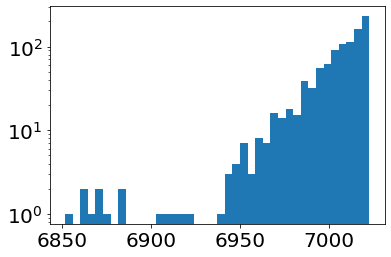

In [128]:
plt.hist(df['caloR'],bins=40)
plt.yscale("log")
plt.show()

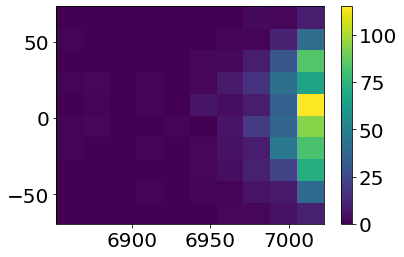

In [130]:
plt.hist2d(df['caloR'], df['caloY'])
plt.colorbar()
plt.show()

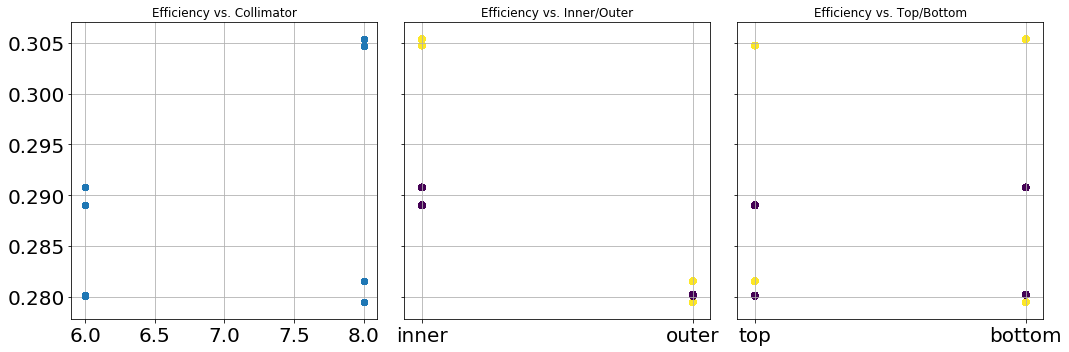

In [5]:
fig,ax = plt.subplots(1,3,figsize=(15,5), sharey=True)

axi = ax[0]
axi.plot(df['coll'], df['efficiency'],"o")
axi.set_title("Efficiency vs. Collimator")

axi = ax[1]
scatter = axi.scatter(df['in-out'], df['efficiency'], c = df['corner'])
axi.set_title("Efficiency vs. Inner/Outer")

legend1 = axi.legend(*scatter.legend_elements(),
                    #loc="lower left", 
                    title="Corner", 
                    ncol=2)
axi.add_artist(legend1)


axi = ax[2]
axi.scatter(df['top-bot'], df['efficiency'], c = df['coll'])
axi.set_title("Efficiency vs. Top/Bottom")

for axi in ax:
    axi.grid()
    
plt.tight_layout()
plt.show()

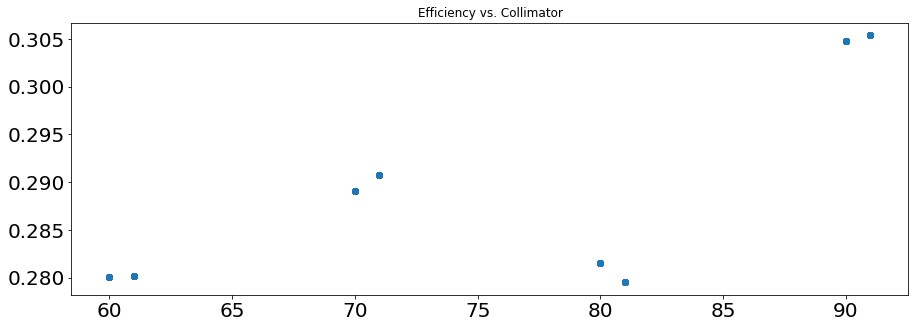

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df['coll']*10+df['corner_num'], df['efficiency'],"o")
ax.set_title("Efficiency vs. Collimator")
plt.show()

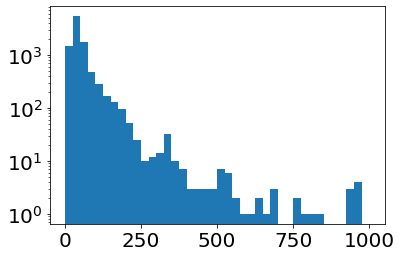

In [17]:
plt.hist(df['drifttime'],bins=40, range=(0,1000))
plt.yscale("log")
plt.show()

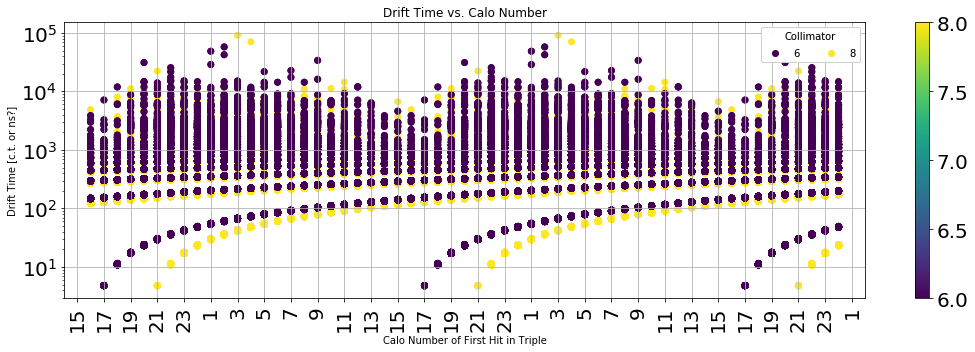

In [8]:
fig,ax = plt.subplots(figsize=(15,5))

if(True):
    splitcalo = 15
    dfi = df.loc[df['calo'] >= splitcalo]
    plt.scatter(dfi['calo']+1-24, dfi['drifttime'], c=dfi['coll'])
    plt.scatter(df['calo']+1+24, df['drifttime'], c=df['coll'])
    
    plt.xticks([x for x in range(splitcalo-24, 500,2)], labels=[x%24 for x in range(splitcalo-24, 500,2)],
              rotation=90)
scatter = plt.scatter((df['calo']+1), df['drifttime'],c=df['coll'])
plt.colorbar()
plt.yscale("log")
plt.title("Drift Time vs. Calo Number")
plt.ylabel("Drift Time [c.t. or ns?]")
plt.xlabel("Calo Number of First Hit in Triple")
plt.grid()

legend1 = ax.legend(*scatter.legend_elements(),
                    #loc="lower left", 
                    title="Collimator", 
                    ncol=2)
ax.add_artist(legend1)

'''handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, title="Efficiency", loc=4)'''

plt.xlim(-10,50)
plt.tight_layout()
plt.show()

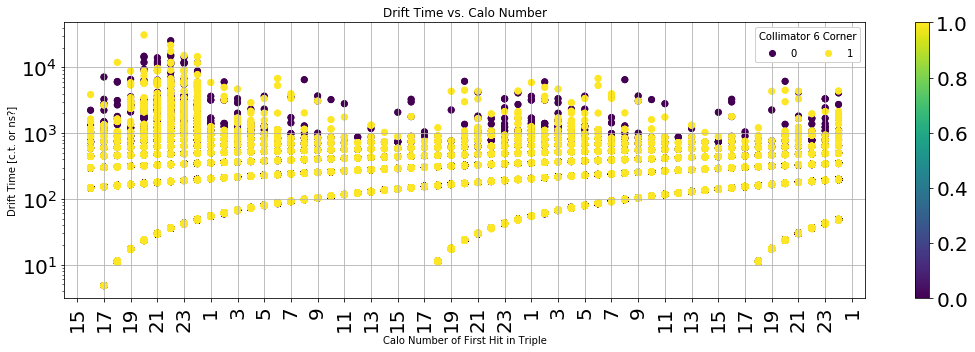

In [9]:
fig,ax = plt.subplots(figsize=(15,5))

collimator = 6
dfii = df.loc[df['coll'] == collimator].loc[df['corner_num'] < 9]

if(True):
    splitcalo = 15
    dfi = df.loc[df['calo'] >= splitcalo].loc[df['coll'] == collimator].loc[df['corner_num'] > 9]
    plt.scatter(dfi['calo']+1-24, dfi['drifttime'], c=dfi['corner_num'])
    plt.scatter(dfii['calo']+1+24, dfii['drifttime'], c=dfii['corner_num'])
    
    plt.xticks([x for x in range(splitcalo-24, 500,2)], labels=[x%24 for x in range(splitcalo-24, 500,2)],
              rotation=90)
scatter = plt.scatter((dfii['calo']+1), dfii['drifttime'],c=dfii['corner_num'])
plt.colorbar()
plt.yscale("log")
plt.title("Drift Time vs. Calo Number")
plt.ylabel("Drift Time [c.t. or ns?]")
plt.xlabel("Calo Number of First Hit in Triple")
plt.grid()

legend1 = ax.legend(*scatter.legend_elements(),
                    #loc="lower left", 
                    title="Collimator "+str(collimator)+" Corner", 
                    ncol=2)
ax.add_artist(legend1)

'''handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, title="Efficiency", loc=4)'''

plt.xlim(-10,50)
plt.tight_layout()
plt.show()

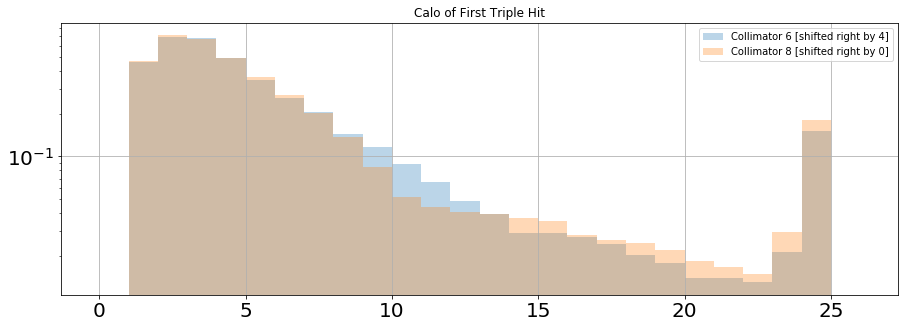

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
for coll in [6,8]:
    dfi = df.loc[df['coll'] == coll]
    if coll == 6:
        offset = 4
    else:
        offset = 0
    plt.hist(((dfi['calo']+1+offset)%24)+1, range=(0,26), bins=26 ,
             label="Collimator "+str(coll)+" [shifted right by "+str(offset)+"]", alpha=0.3, weights=1./dfi['goodtriples'])
plt.legend()
plt.title("Calo of First Triple Hit")
plt.yscale("log")
plt.grid()
plt.show()

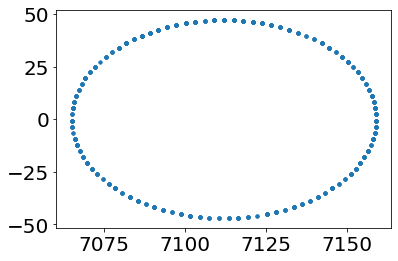

In [133]:
plt.plot(df['collR'], df['collY'],".")
#plt.yscale("log")
plt.show()

---

### Now lets look at the output from the root file

In [148]:
f = r.TFile("./data/histograms_collimator_may12.root")
f.ls()

TFile**		./data/histograms_collimator_may12.root	
 TFile*		./data/histograms_collimator_may12.root	
  KEY: TH2I	hithist;1	Collimator + Calo Hits in the Ring
  KEY: TH3I	nhitsvscalo;1	Number of Calo Entries vs. First Calo Hit vs. Collimator
  KEY: TH2I	drifttime;1	Drift Time vs. First Calo Hit
  KEY: TH3I	yposvscorner;1	y-Position of Calo Hit vs. Corner of Collimator
  KEY: TH2I	deltat;1	Time difference of first and second hit
  KEY: TH3I	rposvscorner;1	R-Position of Calo Hit vs. Corner of Collimator


In [149]:
hithist = f.Get("hithist").Clone()

In [150]:
nhitsvscalo = f.Get("nhitsvscalo").Clone()

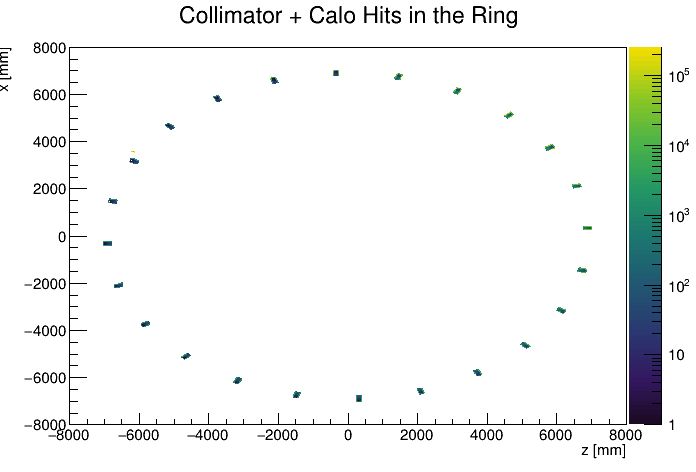

In [151]:
c = r.TCanvas()
hithist.Draw("colz")
c.SetLogz()
c.Draw()

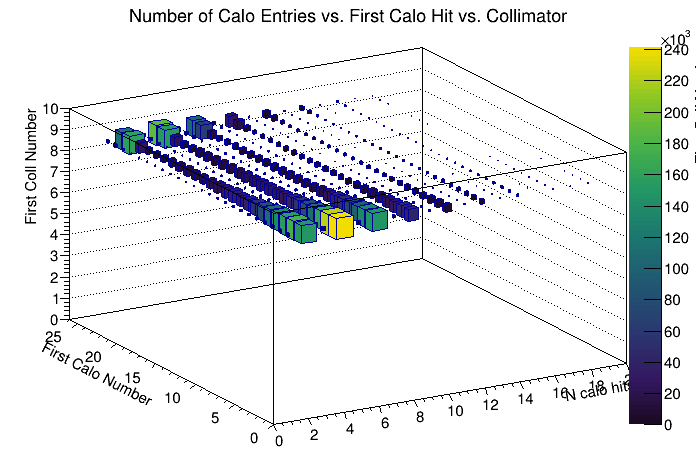

In [152]:
c = r.TCanvas()
nhitsvscalo.Draw("lego2z")
c.Draw()

### Lets get the ratio of triples to quadruples by calorimeter

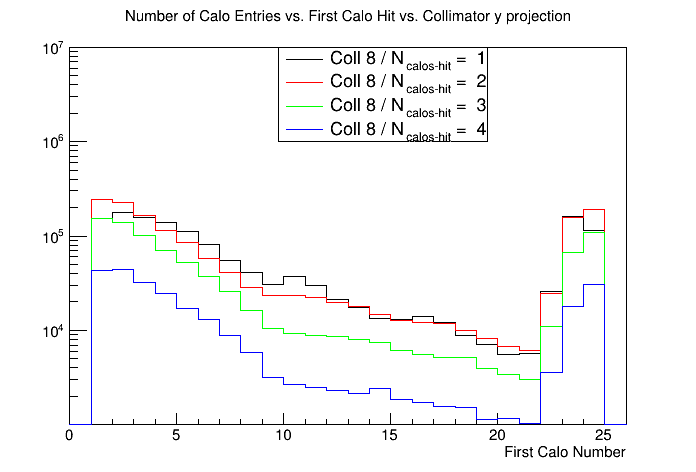

In [153]:
hitnums = [1,2,3,4]
collimators = [8]
c = r.TCanvas()

leg = r.TLegend(0.4,0.7,0.7,0.9)
hists = []

counter = 0
for hit in hitnums:
    for coll in collimators:
        hitbin = nhitsvscalo.GetXaxis().FindBin(hit*2)
        collbin = nhitsvscalo.GetZaxis().FindBin(coll)
        nhitsvscalo.GetXaxis().SetRange( hitbin-1, hitbin )
        nhitsvscalo.GetZaxis().SetRange( collbin, collbin )
        
        hi = nhitsvscalo.Project3D("y").Clone()
        hi.SetLineColor(counter+1)
        hi.GetYaxis().SetRangeUser(1000,10000000)
        hists.append(hi.Clone(str(coll)+"_"+str(hit)))
        leg.AddEntry(hists[counter], "Coll "+str(coll)+" / N_{ calos-hit} =  "+str(hit), "l")
        
        if(counter == 0):
            hi.DrawCopy("hist")
        else:
            hi.DrawCopy("hist same")
        counter += 1
leg.Draw()
c.SetLogy()
c.Draw()

0.29690685711943215


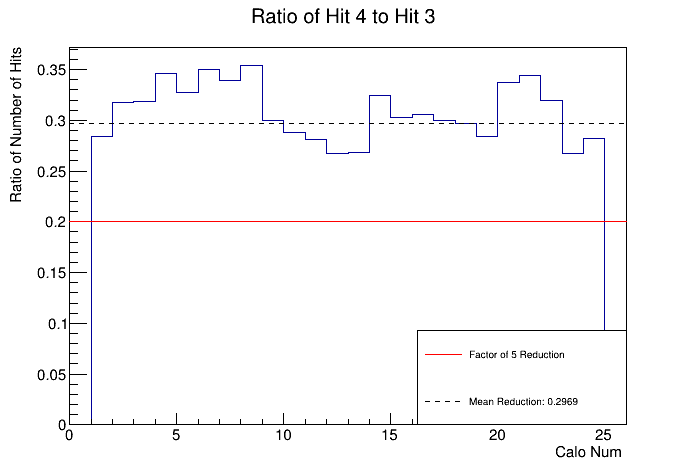

In [154]:
r1 = 4
r2 = 3
coll = 8

hitbin = nhitsvscalo.GetXaxis().FindBin(r1*2)
collbin = nhitsvscalo.GetZaxis().FindBin(coll)
nhitsvscalo.GetXaxis().SetRange( hitbin-1, hitbin )
nhitsvscalo.GetZaxis().SetRange( collbin, collbin )
h1 = nhitsvscalo.Project3D("y").Clone("h1")

hitbin = nhitsvscalo.GetXaxis().FindBin(r2*2)
nhitsvscalo.GetXaxis().SetRange( hitbin-1, hitbin )
h2 = nhitsvscalo.Project3D("y").Clone("h2")


h1.Divide(h2)
h1.SetTitle("Ratio of Hit "+str(r1)+" to Hit "+str(r2)+"; Calo Num ; Ratio of Number of Hits")


line = r.TLine(0,(1/5.), 26, (1/5.))
line.SetLineColor(2)

mean = 0
for i in range(1,25):
    mean += h1.GetBinContent(i) / 24.
print(mean)

line2 = r.TLine(0, mean, 26, mean)
line2.SetLineStyle(7)


c = r.TCanvas()
leg = r.TLegend(0.6,0.1,0.9,0.3)
h1.Draw()
line.Draw("SAME")
leg.AddEntry(line, "Factor of 5 Reduction", "l")
line2.Draw("SAME")
leg.AddEntry(line2, "Mean Reduction: "+str(round(mean,4)), "l")

leg.Draw("SAME")
c.Draw()

In [155]:
yposvscorner = f.Get("yposvscorner").Clone()

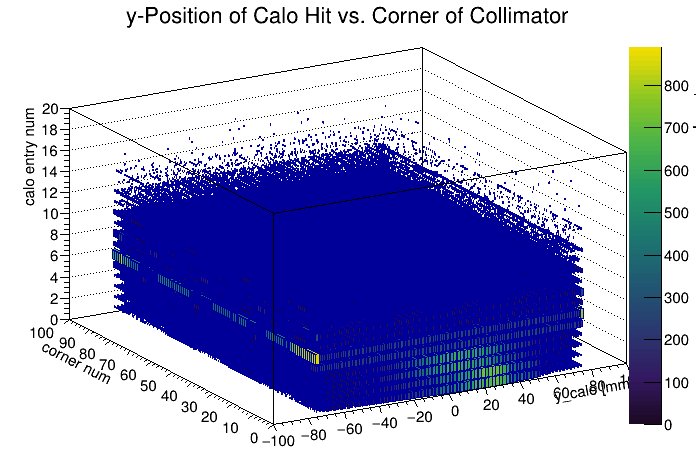

In [156]:
c = r.TCanvas()
yposvscorner.Draw("lego2z")
c.Draw()

In [138]:
cornernames = {0:'col 6 outer top', 1:'col 6 outer bottom', 5:'col 8 outer top', 6:'col 8 outer bottom',
                      10:'col 6 inner top', 11:'col 6 inner bottom', 15:'col 8 inner top', 16:'col 8 inner bottom'  }

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


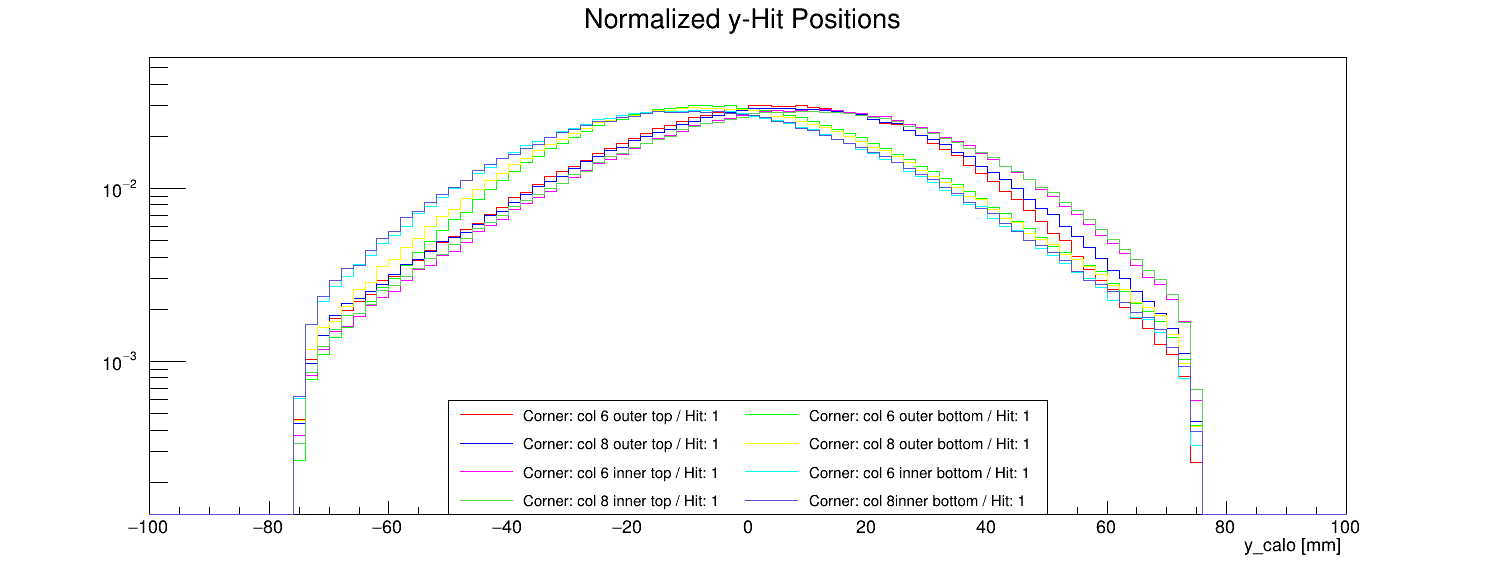

In [147]:
hits = [1,2,3,4,5]
corners = [0,1,
           5,6,
           10,11,
           15,16]

c = r.TCanvas("c","c",1500,600)
leg = r.TLegend(0.3,0.1,0.7,0.3)
leg.SetNColumns(2)

i = 0
hists = []
for hit in hits:
    for corner in corners:

        hitbin = yposvscorner.GetYaxis().FindBin(corner)
        collbin = yposvscorner.GetZaxis().FindBin(hit*2)
        yposvscorner.GetYaxis().SetRange( hitbin, hitbin )
        yposvscorner.GetZaxis().SetRange( collbin, collbin )
        h1 = yposvscorner.Project3D("x").Clone("h1")
        h1.SetTitle("Normalized y-Hit Positions")
        h1.SetLineColor(i+2)
        h1.Scale(1/h1.Integral())
        hists.append(h1.Clone("Corner: "+str(corner)+" / Hit: "+str(hit)))
        leg.AddEntry(hists[i], "Corner: "+str(cornernames[corner])+" / Hit: "+str(hit), "l")

        if(i < 1):
            hists[i].Draw("hist")
        else:
            hists[i].Draw("hist SAME")

        i+=1
leg.Draw()
c.SetLogy()
c.Draw()